In [54]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
sp500_data = pd.read_csv("sp500_hist.csv")

In [56]:
sp500_data["Date"] = pd.to_datetime(sp500_data["Date"])
sp500_data.head()

,Date,Open,High,Low,Close
0,2022-03-22,4469.10,4522.00,4469.10,4511.61
1,2022-03-21,4462.40,4481.75,4424.30,4461.18
2,2022-03-18,4407.34,4465.40,4390.57,4463.12
3,2022-03-17,4345.11,4412.67,4335.65,4411.67
4,2022-03-16,4288.14,4358.90,4251.99,4357.86


In [62]:
sp500_data = sp500_data.iloc[::-1]

In [68]:
sp500_data.head()

,Date,Open,High,Low,Close
5590,2000-01-03,1455.22,1478.00,1438.36,1455.22
5589,2000-01-04,1399.42,1455.22,1397.43,1399.42
5588,2000-01-05,1402.11,1413.27,1377.68,1402.11
5587,2000-01-06,1403.45,1411.90,1392.02,1403.45
5586,2000-01-07,1441.47,1441.47,1400.53,1441.47


In [73]:
sp500_data.set_index(sp500_data['Date'], inplace=True)

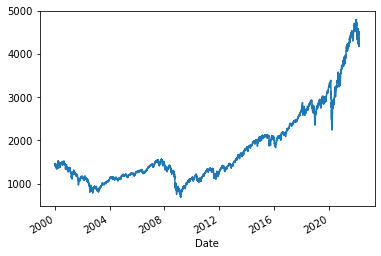

In [74]:
sp500_data['Close'].plot()
plt.show()

In [98]:
data = sp500_data

In [83]:
from scipy.signal import argrelextrema
import numpy as np
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

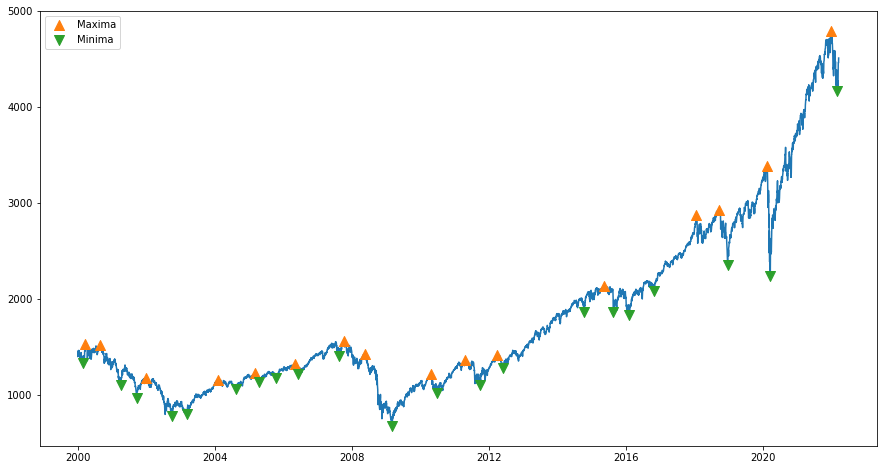

In [125]:
max_idx = argrelextrema(data['Close'].values, np.greater, order=80)[0]
min_idx = argrelextrema(data['Close'].values, np.less, order=80)[0]
plt.figure(figsize=(15, 8))
plt.plot(data['Close'], zorder=0)
plt.scatter(data.iloc[max_idx].index, data.iloc[max_idx]['Close'],
  label='Maxima', s=100, color=colors[1], marker='^')
plt.scatter(data.iloc[min_idx].index, data.iloc[min_idx]['Close'],
  label='Minima', s=100, color=colors[2], marker='v')

plt.legend()
plt.show()

In [192]:
test = pd.DataFrame(columns=['Date High', 'High', 'Date Low', 'Low', 'Duration', 'Change'])
test_datehigh = []
test_high = []

for x in max_idx:
    test_datehigh.append(data.iloc[x]['Date'])
    test_high.append(data.iloc[x]['Close'])
test['Date High'] = test_datehigh
test['High'] = test_high 
test
# test_datelow = []
# test_low = []
# for x in min_idx:
#     test_datelow.append(data.iloc[x]['Date'])
#     test_low.append(data.iloc[x]['Close'])
# test['Date Low'] = test_datelow
# test['Low'] = test_low 

# test

,Date High,High,Date Low,Low,Duration,Change
0,2000-03-24,1527.46,NaN,NaN,NaN,NaN
1,2000-09-01,1520.77,NaN,NaN,NaN,NaN
2,2002-01-04,1172.51,NaN,NaN,NaN,NaN
3,2004-02-11,1157.76,NaN,NaN,NaN,NaN
4,2005-03-07,1225.31,NaN,NaN,NaN,NaN
5,2006-05-05,1325.76,NaN,NaN,NaN,NaN
6,2007-10-09,1565.15,NaN,NaN,NaN,NaN
7,2008-05-19,1426.63,NaN,NaN,NaN,NaN
8,2010-04-23,1217.28,NaN,NaN,NaN,NaN
9,2011-04-29,1363.61,NaN,NaN,NaN,NaN


In [193]:
doei = [1,3,4,5,7,10]
update = test.drop([1,3,4,5,7,10])
update.reset_index(inplace=True)
update

,index,Date High,High,Date Low,Low,Duration,Change
0,0,2000-03-24,1527.46,NaN,NaN,NaN,NaN
1,2,2002-01-04,1172.51,NaN,NaN,NaN,NaN
2,6,2007-10-09,1565.15,NaN,NaN,NaN,NaN
3,8,2010-04-23,1217.28,NaN,NaN,NaN,NaN
4,9,2011-04-29,1363.61,NaN,NaN,NaN,NaN
5,11,2015-05-21,2130.82,NaN,NaN,NaN,NaN
6,12,2018-01-26,2872.87,NaN,NaN,NaN,NaN
7,13,2018-09-20,2930.75,NaN,NaN,NaN,NaN
8,14,2020-02-19,3386.15,NaN,NaN,NaN,NaN
9,15,2022-01-03,4796.56,NaN,NaN,NaN,NaN


In [194]:
test1 = pd.DataFrame(columns=['Date Low', 'Low'])
test_datelow = []
test_low = []
for x in min_idx:
    test_datelow.append(data.iloc[x]['Date'])
    test_low.append(data.iloc[x]['Close'])
test1['Date Low'] = test_datelow
test1['Low'] = test_low 
test1

,Date Low,Low
0,2000-02-25,1333.36
1,2001-04-04,1103.25
2,2001-09-21,965.80
3,2002-10-09,776.76
4,2003-03-11,800.73
5,2004-08-12,1063.23
6,2005-04-20,1137.50
7,2005-10-13,1176.84
8,2006-06-13,1223.69
9,2007-08-15,1406.70


In [195]:
dag = [0,1,2,5,6,7,8,9,13,14,17]
update1 = test1.drop([0,1,2,5,6,7,8,9,13,14,17])
update1.reset_index(inplace=True)
update['Date Low'] = update1['Date Low']
update['Low'] = update1['Low']

In [196]:
update

,index,Date High,High,Date Low,Low,Duration,Change
0,0,2000-03-24,1527.46,2002-10-09,776.76,NaN,NaN
1,2,2002-01-04,1172.51,2003-03-11,800.73,NaN,NaN
2,6,2007-10-09,1565.15,2009-03-09,676.53,NaN,NaN
3,8,2010-04-23,1217.28,2010-07-02,1022.58,NaN,NaN
4,9,2011-04-29,1363.61,2011-10-03,1099.23,NaN,NaN
5,11,2015-05-21,2130.82,2015-08-25,1867.61,NaN,NaN
6,12,2018-01-26,2872.87,2016-02-11,1829.08,NaN,NaN
7,13,2018-09-20,2930.75,2018-12-24,2351.10,NaN,NaN
8,14,2020-02-19,3386.15,2020-03-23,2237.40,NaN,NaN
9,15,2022-01-03,4796.56,2022-03-08,4170.70,NaN,NaN


In [197]:
duration = update['Date Low'] - update['Date High']
update['Duration'] = duration
update

,index,Date High,High,Date Low,Low,Duration,Change
0,0,2000-03-24,1527.46,2002-10-09,776.76,929 days,NaN
1,2,2002-01-04,1172.51,2003-03-11,800.73,431 days,NaN
2,6,2007-10-09,1565.15,2009-03-09,676.53,517 days,NaN
3,8,2010-04-23,1217.28,2010-07-02,1022.58,70 days,NaN
4,9,2011-04-29,1363.61,2011-10-03,1099.23,157 days,NaN
5,11,2015-05-21,2130.82,2015-08-25,1867.61,96 days,NaN
6,12,2018-01-26,2872.87,2016-02-11,1829.08,-715 days,NaN
7,13,2018-09-20,2930.75,2018-12-24,2351.10,95 days,NaN
8,14,2020-02-19,3386.15,2020-03-23,2237.40,33 days,NaN
9,15,2022-01-03,4796.56,2022-03-08,4170.70,64 days,NaN


In [198]:
change = (update['Low'] - update['High'])/update['High'] * 100
update['Change'] = round(change,1)
update

,index,Date High,High,Date Low,Low,Duration,Change
0,0,2000-03-24,1527.46,2002-10-09,776.76,929 days,-49.1
1,2,2002-01-04,1172.51,2003-03-11,800.73,431 days,-31.7
2,6,2007-10-09,1565.15,2009-03-09,676.53,517 days,-56.8
3,8,2010-04-23,1217.28,2010-07-02,1022.58,70 days,-16.0
4,9,2011-04-29,1363.61,2011-10-03,1099.23,157 days,-19.4
5,11,2015-05-21,2130.82,2015-08-25,1867.61,96 days,-12.4
6,12,2018-01-26,2872.87,2016-02-11,1829.08,-715 days,-36.3
7,13,2018-09-20,2930.75,2018-12-24,2351.10,95 days,-19.8
8,14,2020-02-19,3386.15,2020-03-23,2237.40,33 days,-33.9
9,15,2022-01-03,4796.56,2022-03-08,4170.70,64 days,-13.0


In [199]:
update.pop('index')
update.pop('Date Low')
update

,Date High,High,Low,Duration,Change
0,2000-03-24,1527.46,776.76,929 days,-49.1
1,2002-01-04,1172.51,800.73,431 days,-31.7
2,2007-10-09,1565.15,676.53,517 days,-56.8
3,2010-04-23,1217.28,1022.58,70 days,-16.0
4,2011-04-29,1363.61,1099.23,157 days,-19.4
5,2015-05-21,2130.82,1867.61,96 days,-12.4
6,2018-01-26,2872.87,1829.08,-715 days,-36.3
7,2018-09-20,2930.75,2351.10,95 days,-19.8
8,2020-02-19,3386.15,2237.40,33 days,-33.9
9,2022-01-03,4796.56,4170.70,64 days,-13.0
